In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [27]:
## design tensorflow function which performs CNN encoding
def simple_encoder_layer(input_image):
    '''
    #input image should be a tensorflow tensor
    should accept an input 127x127 rgb image (W x H x C); #color channels should be last dim
    should ouput a dense representation or encoding
    '''
    tf.reset_default_graph()
    
    input_layer = tf.placeholder(tf.float32, shape=(None, 127, 127, 3), name = 'input_layer')
    
    conv7 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[7,7],
      padding="same",
      activation=tf.nn.relu)
    
    #add a maxpool
    pool7 = tf.layers.max_pooling2d(inputs=conv7, pool_size=[2, 2], strides=2)

    #use a for loop for the remaining 5 3x3 convs
    for i in range(5):
        conv3 = tf.layers.conv2d(
          inputs=pool7,
          filters=32,
          kernel_size=[3,3],
          padding="same",
          activation=tf.nn.relu)
        pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
        pool7 = pool3;
        
    #add in dense layer
    pool_flat = tf.contrib.layers.flatten(pool7)
    dense = tf.layers.dense(inputs=pool_flat, units=1024, activation=tf.nn.relu)
    
    #run this
    init = tf.global_variables_initializer();
    sess = tf.Session();
    sess.run(init)
    output = sess.run(dense, feed_dict={input_layer: input_image})
    sess.close();
    return output;
    

(1, 127, 127, 3)
(1, 1024)


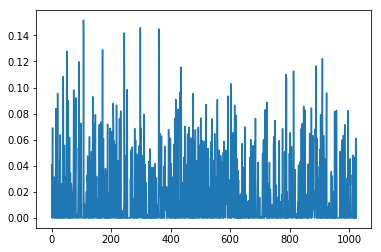

In [29]:
''' test encoder architecture'''

test_image = np.random.rand(1, 127, 127, 3)
print(test_image.shape)

test_out = simple_encoder_layer(test_image)

print(test_out.shape)
plt.figure();
plt.plot(test_out[0])
plt.show()